In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
# pip install geopandas
import geopandas as gpd
from shapely.geometry import Polygon
import os
from shapely.geometry import Polygon, MultiPolygon, MultiPoint
import pyproj
from shapely.ops import transform
from functools import partial

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Spark Project/Data/census_bike_merged.csv")

# Display the DataFrame
df.head()

,tract,year,neighborhood,total_population,male,female,median_age,race_white,race_black,race_ai_alaskan,...,renters_owners_pre-2000_ratio,BFBL,BL,BLSL,SBL,SLM,SLMTC,SUP,total_built_all_lanes,cumulative_length
0,1001.0,2010,Dorchester,5617.0,0.481,0.519,23.9,0.063,0.638,0.012,...,0.700662,0.0,2493.815844,0.0,0.0,563.192706,0.0,0.0,3057.008550,3167.046929
1,1001.0,2011,Dorchester,5657.0,0.480,0.520,24.5,0.109,0.619,0.014,...,0.774003,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,3167.046929
2,1001.0,2012,Dorchester,6189.0,0.451,0.549,25.2,0.074,0.701,0.004,...,1.260708,0.0,851.779668,0.0,0.0,684.141817,0.0,0.0,1535.921485,4702.968414
3,1001.0,2013,Dorchester,6295.0,0.433,0.567,27.3,0.112,0.727,0.001,...,1.236902,0.0,36.450628,0.0,0.0,0.000000,0.0,0.0,36.450628,4739.419042
4,1001.0,2014,Dorchester,6371.0,0.455,0.545,31.2,0.131,0.750,0.001,...,0.946850,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,4739.419042


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tract                          696 non-null    float64
 1   year                           696 non-null    int64  
 2   neighborhood                   696 non-null    object 
 3   total_population               564 non-null    float64
 4   male                           564 non-null    float64
 5   female                         564 non-null    float64
 6   median_age                     564 non-null    float64
 7   race_white                     564 non-null    float64
 8   race_black                     564 non-null    float64
 9   race_ai_alaskan                564 non-null    float64
 10  race_asian                     564 non-null    float64
 11  race_hawaiian                  564 non-null    float64
 12  race_other                     564 non-null    flo

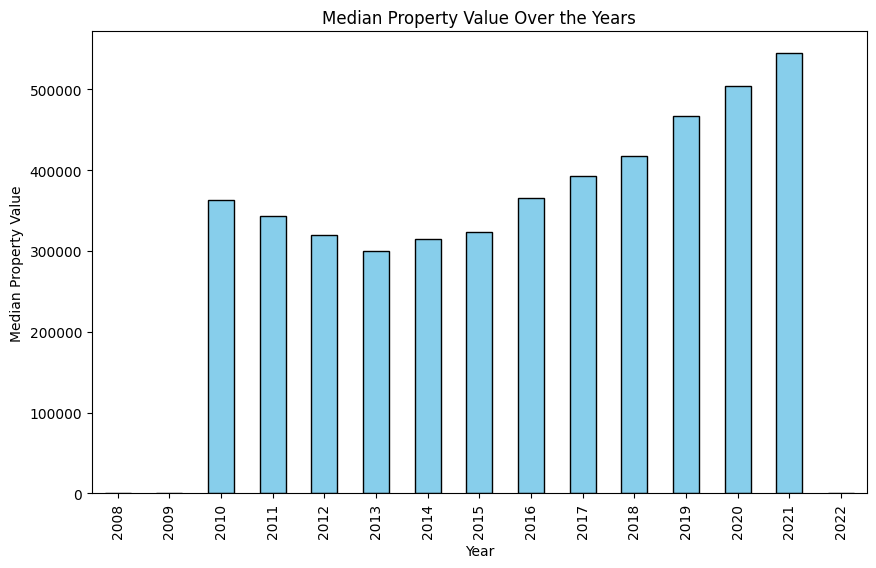

In [7]:
import matplotlib.pyplot as plt


# Group by 'year' and calculate the median value for each year
median_values_by_year = df.groupby('year')['median_value'].median()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
median_values_by_year.plot(kind='bar', stacked=True, color='skyblue', edgecolor='black')

plt.title('Median Property Value Over the Years')
plt.xlabel('Year')
plt.ylabel('Median Property Value')
plt.show()


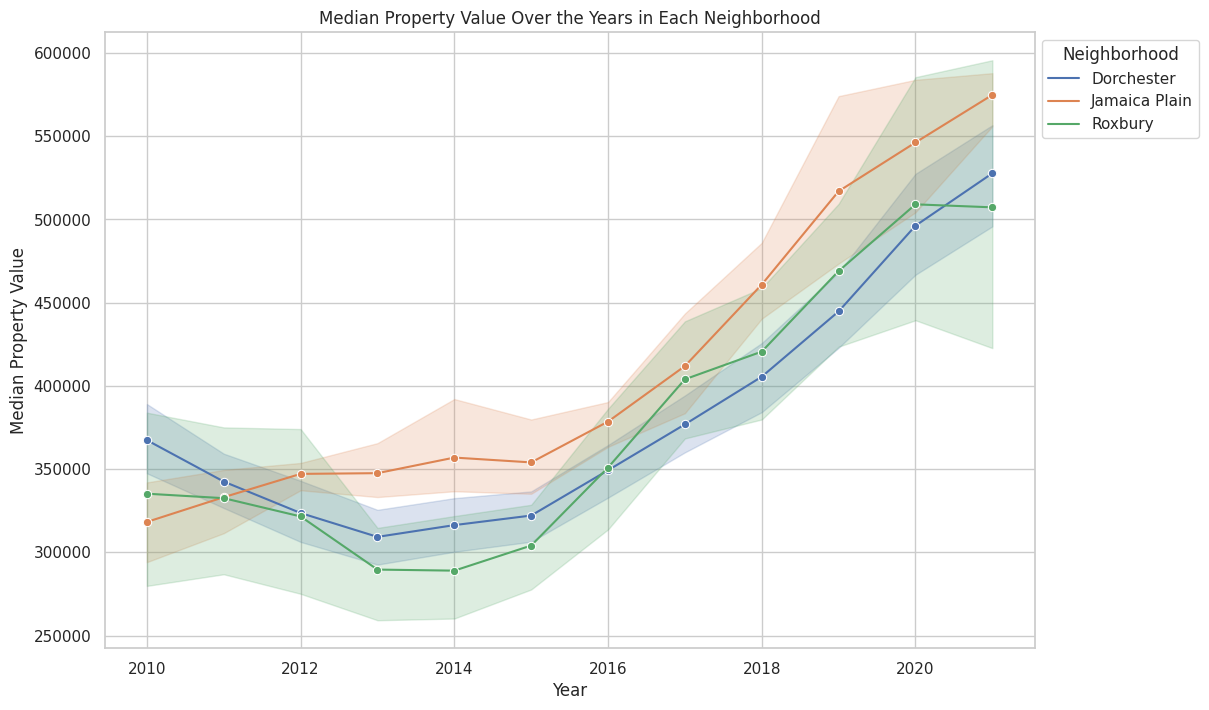

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# Plotting the line plot for each neighborhood
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='median_value', hue='neighborhood', data=df, marker='o')

plt.title('Median Property Value Over the Years in Each Neighborhood')
plt.xlabel('Year')
plt.ylabel('Median Property Value')
plt.legend(title='Neighborhood', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


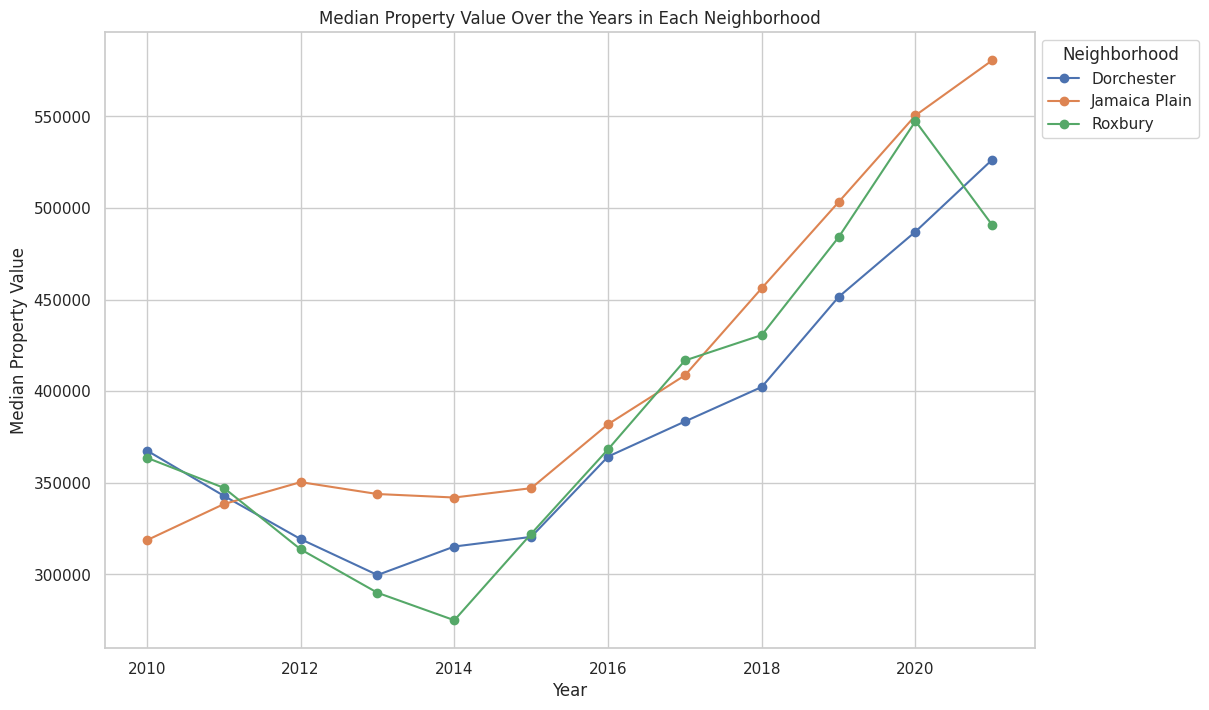

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# If your 'year' column is not already in datetime format, you can convert it:
# df['year'] = pd.to_datetime(df['year'], format='%Y')

# Set the plotting style
sns.set(style="whitegrid")

# Calculate median values by year and neighborhood
median_values_by_neighborhood = df.groupby(['year', 'neighborhood'])['median_value'].median().unstack()

# Plotting the line plot for median property values over the years for each neighborhood
plt.figure(figsize=(12, 8))
for neighborhood in median_values_by_neighborhood.columns:
    plt.plot(median_values_by_neighborhood.index, median_values_by_neighborhood[neighborhood], label=neighborhood, marker='o')

plt.title('Median Property Value Over the Years in Each Neighborhood')
plt.xlabel('Year')
plt.ylabel('Median Property Value')
plt.legend(title='Neighborhood', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
